In [2]:
pip install torch-cluster

  Using cached torch_cluster-1.6.1.tar.gz (53 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-cluster
Failed to build torch-cluster
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\fps.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\graclus.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\grid.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\knn.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\nearest.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\radius.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\rw.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\sampler.py -> build\lib.win-amd64-3.9\torch_cluster
      copying torch_cluster\testing.py -> build\lib.

In [5]:
pip install umap-learn

     ---------------------------------------- 88.2/88.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.6/2.6 MB 20.4 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 35.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 27.7/27.7 MB 38.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82918 sha256=2d0cd03612f91cb752b29a04351f2f539833955bfce922ab51ece8ad93b83cc7
  Stored in directory: c:\users\locda\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55676 sha256=ecc23971ca7cbc912a68b43143aec46c3dbc4b5d9f0b471b04114441c790d02b
  Stored in directory: c:\user

In [6]:
pip install seaborn


     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torch_cluster import random_walk
from sklearn.linear_model import LogisticRegression
import torch_geometric.transforms as T
from torch_geometric.nn import SAGEConv
from torch_geometric.datasets import Planetoid
from torch_geometric.data import NeighborSampler as RawNeighborSampler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pip install torch-cluster==1.5.9 -f https://data.pyg.org/whl/torch-1.8.1+cu102.html

Looking in links: https://data.pyg.org/whl/torch-1.8.1+cu102.html
     ---------------------------------------- 1.4/1.4 MB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
from torch_geometric.datasets import KarateClub

In [58]:
dataset = 'Cora'
path = './data'
dataset = Planetoid(path, dataset, transform=T.NormalizeFeatures())
data = dataset[0]

In [18]:
from typing import Optional, Tuple, Union

In [20]:
from torch import Tensor
from sklearn.manifold import TSNE



In [85]:
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


In [86]:
data = dataset[0]

In [87]:

model = MLP(hidden_channels=16)

model.eval()
h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

TypeError: forward() takes 2 positional arguments but 3 were given

In [88]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [89]:
def visualize(h, color, epoch=None, loss=None):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:,0], z[:,1], s = 70, c = color, cmap = "Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [90]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


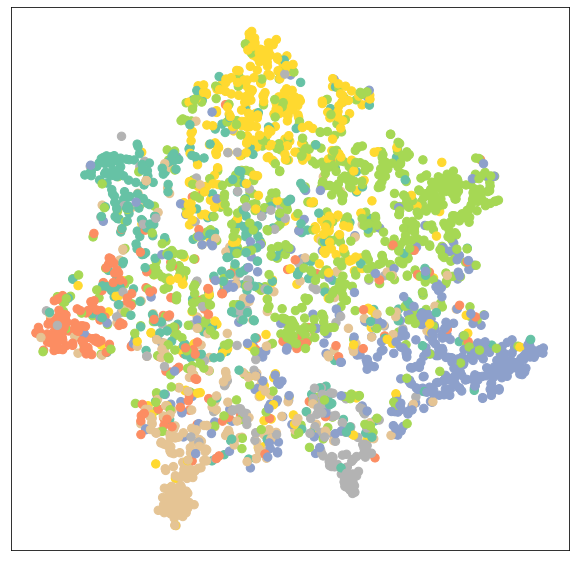

In [92]:
model.eval()

out = model(data.x)
visualize(out, color=data.y)

In [31]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


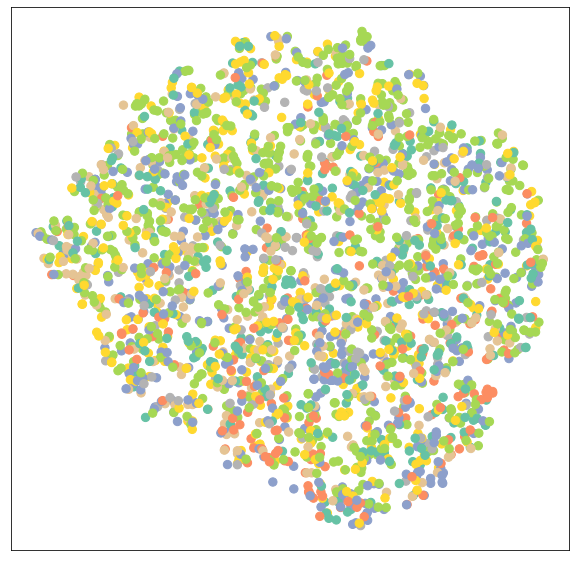

In [83]:
model = MLP(hidden_channels=16)
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [71]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)
        

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


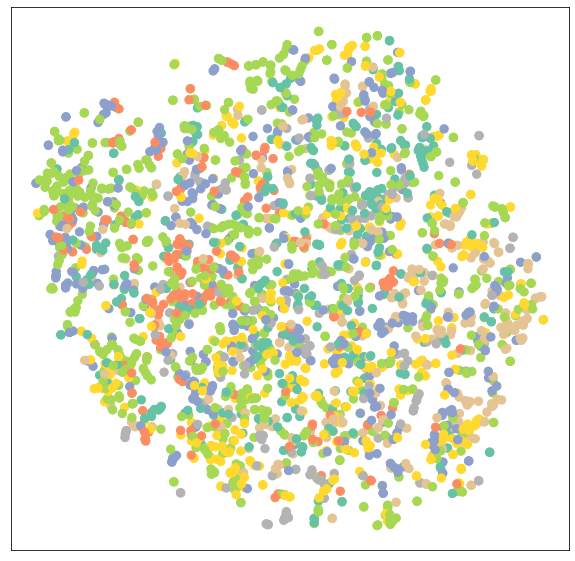

In [73]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [43]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9463
Epoch: 002, Loss: 1.9409
Epoch: 003, Loss: 1.9343
Epoch: 004, Loss: 1.9275
Epoch: 005, Loss: 1.9181
Epoch: 006, Loss: 1.9086
Epoch: 007, Loss: 1.9015
Epoch: 008, Loss: 1.8933
Epoch: 009, Loss: 1.8808
Epoch: 010, Loss: 1.8685
Epoch: 011, Loss: 1.8598
Epoch: 012, Loss: 1.8482
Epoch: 013, Loss: 1.8290
Epoch: 014, Loss: 1.8233
Epoch: 015, Loss: 1.8057
Epoch: 016, Loss: 1.7966
Epoch: 017, Loss: 1.7825
Epoch: 018, Loss: 1.7617
Epoch: 019, Loss: 1.7491
Epoch: 020, Loss: 1.7310
Epoch: 021, Loss: 1.7147
Epoch: 022, Loss: 1.7056
Epoch: 023, Loss: 1.6954
Epoch: 024, Loss: 1.6697
Epoch: 025, Loss: 1.6538
Epoch: 026, Loss: 1.6312
Epoch: 027, Loss: 1.6161
Epoch: 028, Loss: 1.5899
Epoch: 029, Loss: 1.5711
Epoch: 030, Loss: 1.5576
Epoch: 031, Loss: 1.5393
Epoch: 032, Loss: 1.5137
Epoch: 033, Loss: 1.4948
Epoch: 034, Loss: 1.4913
Epoch: 035, Loss: 1.4698
Epoch: 036, Loss: 1.3998
Epoch: 037, Loss: 1.4041
Epoch: 038, Loss: 1.3761
Epoch: 039, Loss: 1.3631
Epoch: 040, Loss: 1.3258


In [40]:
import time

In [53]:
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [74]:
def train(data):
      #model.train()
      optimizer.zero_grad()  # Clear gradients.
      out= model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

In [79]:
for epoch in range(201):
    loss = train(data)
    if epoch % 10 == 0:
        visualize(loss, color=data.y, epoch=epoch, loss=None)
        time.sleep(0.3)
        ## Added by Me
        final_h = h

IndexError: tuple index out of range

In [46]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8150


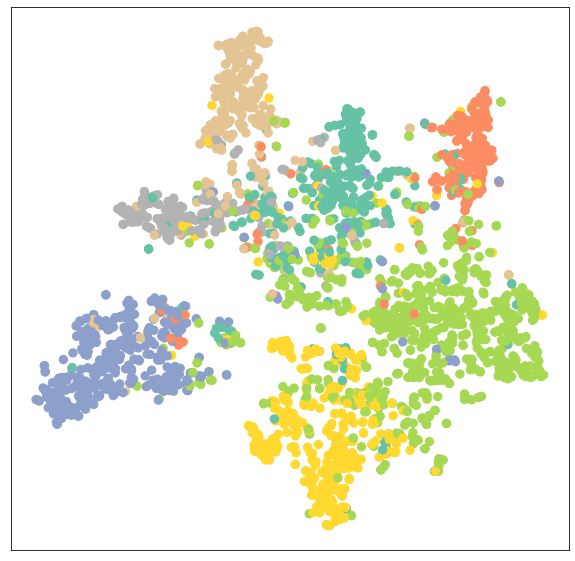

In [36]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [105]:
from torch_geometric.nn import SAGEConv


class SAGE(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = SAGEConv(dataset.num_features, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, dataset.num_classes)
        self.classifier = Linear(7, 2708)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        out = self.classifier(x)
        
        return out, x

model = SAGE(hidden_channels=16)
print(model)

SAGE(
  (conv1): SAGEConv(1433, 16, aggr=mean)
  (conv2): SAGEConv(16, 7, aggr=mean)
  (classifier): Linear(in_features=7, out_features=2708, bias=True)
)


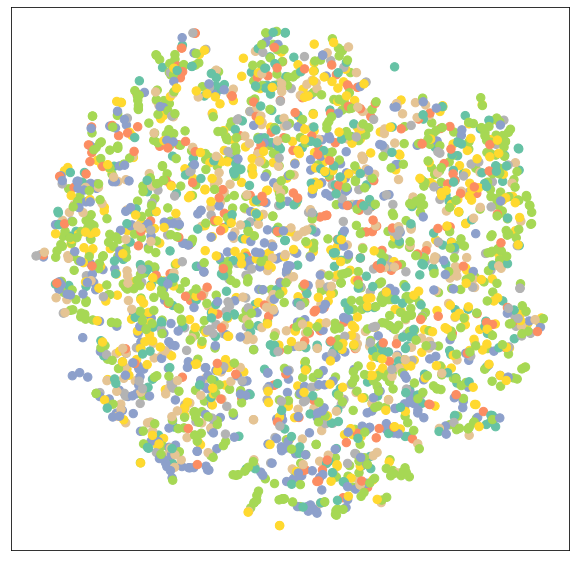

In [106]:
model = SAGE(hidden_channels=16)
model.eval()

out, h = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [115]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = SAGE(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train(data):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, h

def test():
      model.eval()
      out, h = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 101):
    loss, h = train(data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 7.8728
Epoch: 002, Loss: 7.8295
Epoch: 003, Loss: 7.7836
Epoch: 004, Loss: 7.7322
Epoch: 005, Loss: 7.6760
Epoch: 006, Loss: 7.6178
Epoch: 007, Loss: 7.5413
Epoch: 008, Loss: 7.4680
Epoch: 009, Loss: 7.3643
Epoch: 010, Loss: 7.2579
Epoch: 011, Loss: 7.1284
Epoch: 012, Loss: 6.9575
Epoch: 013, Loss: 6.7653
Epoch: 014, Loss: 6.5259
Epoch: 015, Loss: 6.2544
Epoch: 016, Loss: 5.9091
Epoch: 017, Loss: 5.5426
Epoch: 018, Loss: 5.0807
Epoch: 019, Loss: 4.6185
Epoch: 020, Loss: 3.9915
Epoch: 021, Loss: 3.3639
Epoch: 022, Loss: 2.9327
Epoch: 023, Loss: 2.5458
Epoch: 024, Loss: 2.4036
Epoch: 025, Loss: 2.2732
Epoch: 026, Loss: 2.1631
Epoch: 027, Loss: 2.0743
Epoch: 028, Loss: 1.9945
Epoch: 029, Loss: 1.9537
Epoch: 030, Loss: 1.9222
Epoch: 031, Loss: 1.9320
Epoch: 032, Loss: 1.9399
Epoch: 033, Loss: 1.8885
Epoch: 034, Loss: 1.9523
Epoch: 035, Loss: 1.9220
Epoch: 036, Loss: 1.9020
Epoch: 037, Loss: 1.9229
Epoch: 038, Loss: 1.9316
Epoch: 039, Loss: 1.9111
Epoch: 040, Loss: 1.8785


In [116]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7020


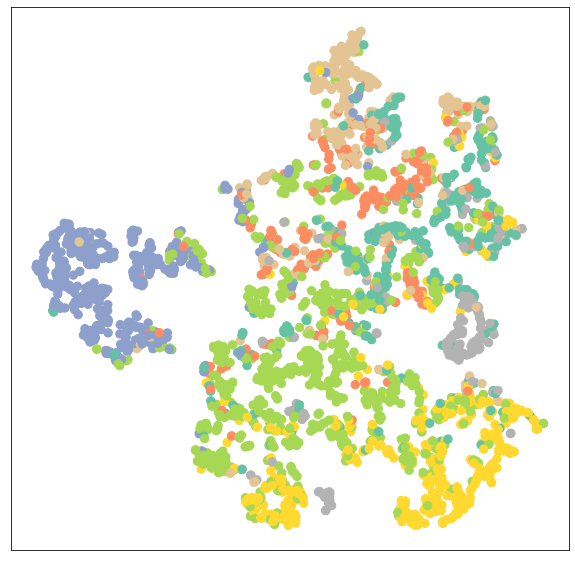

In [117]:
model.eval()

out, h = model(data.x, data.edge_index)
visualize(out, color=data.y)

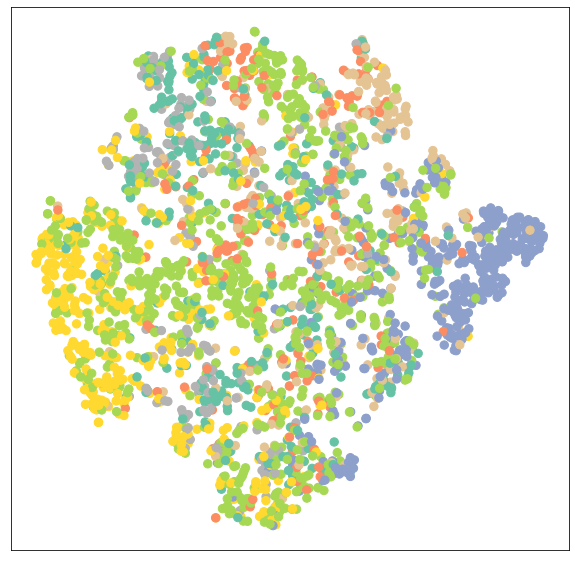

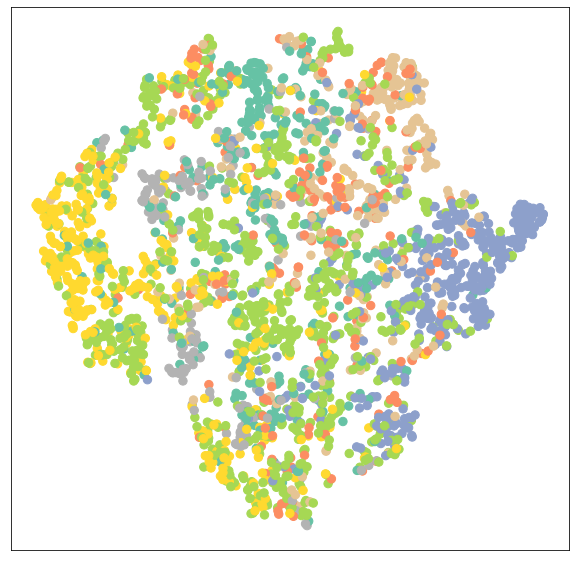

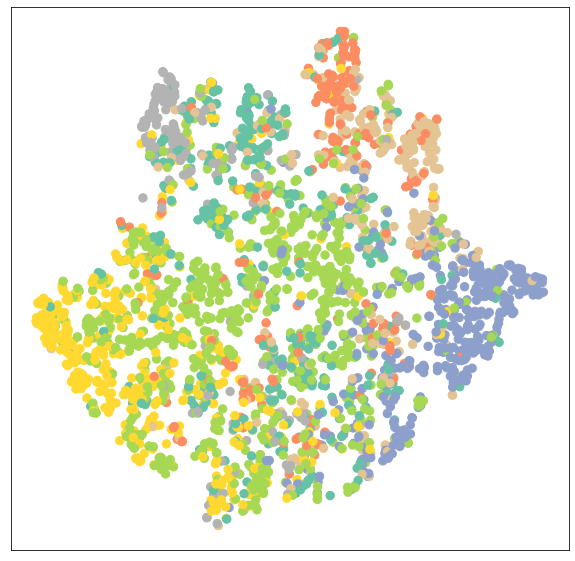

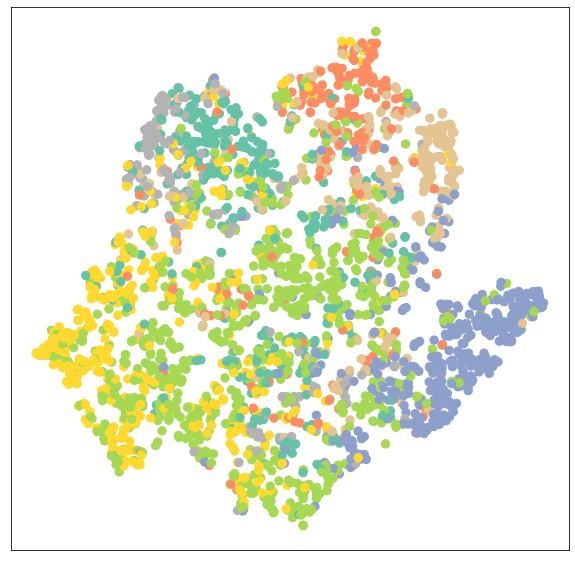

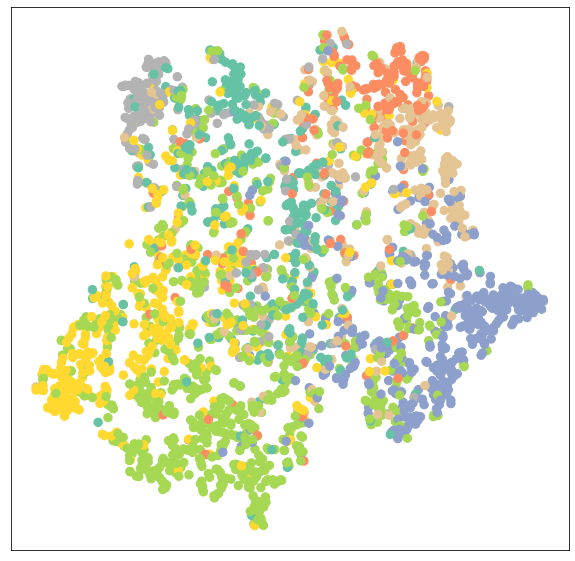

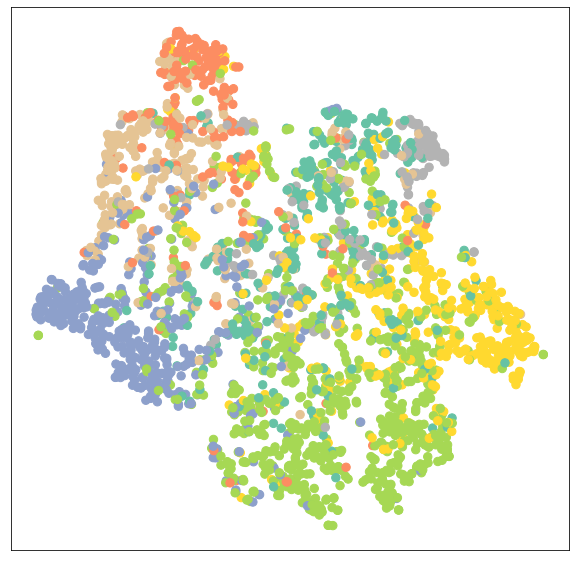

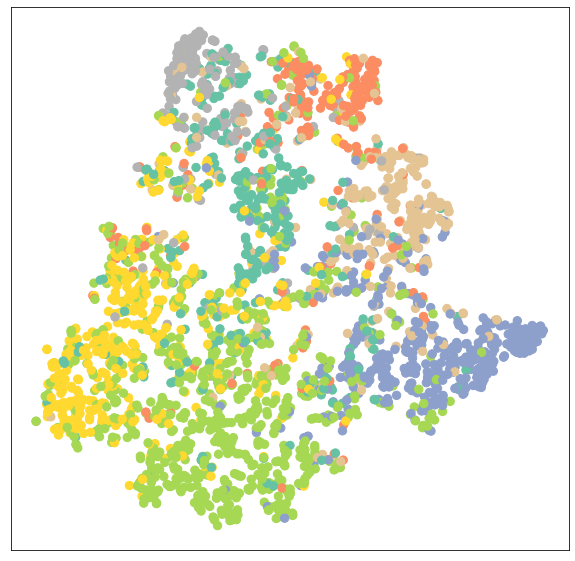

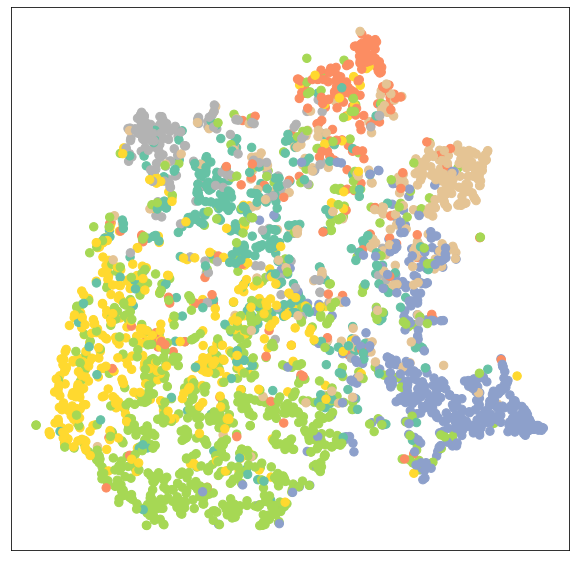

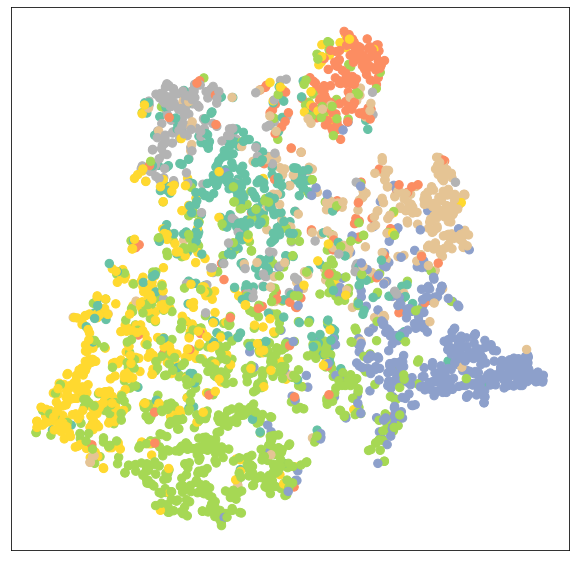

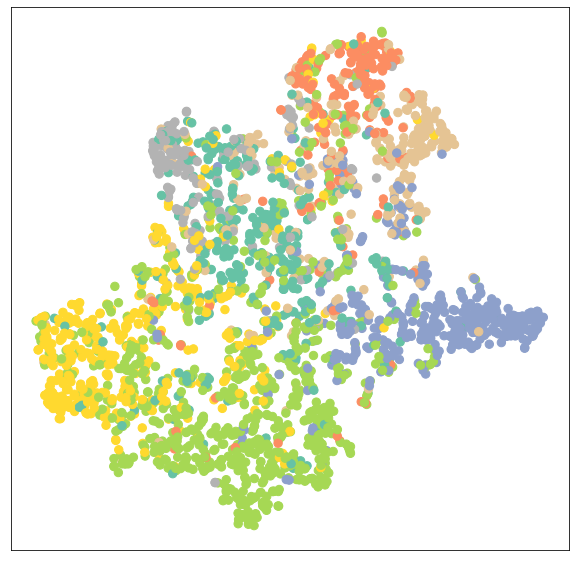

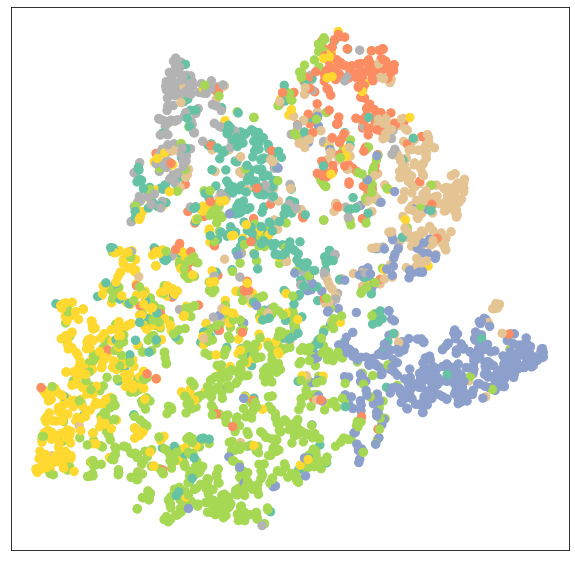

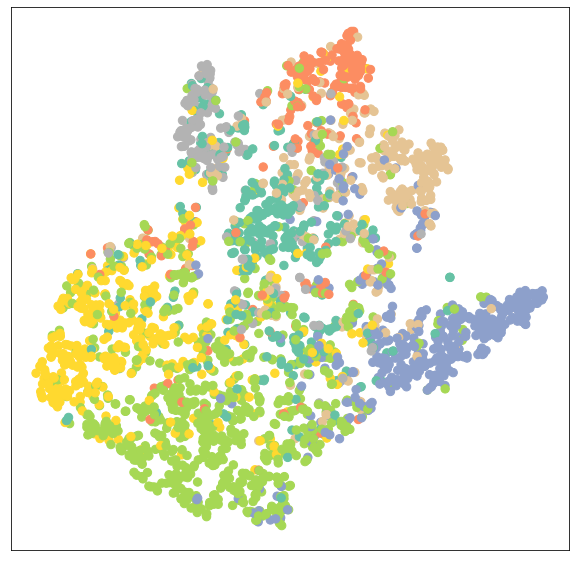

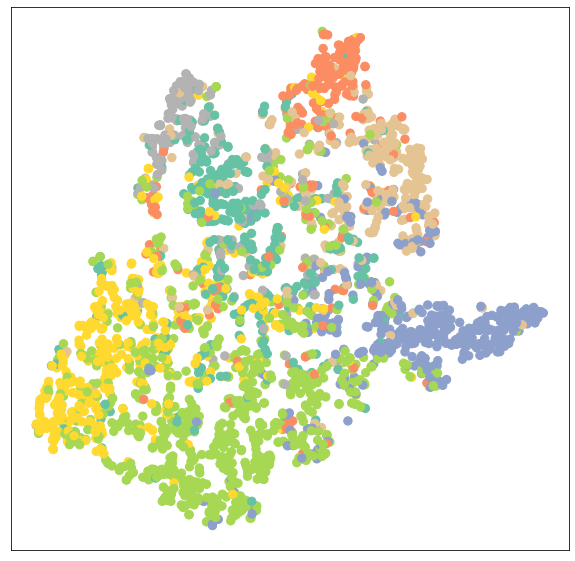

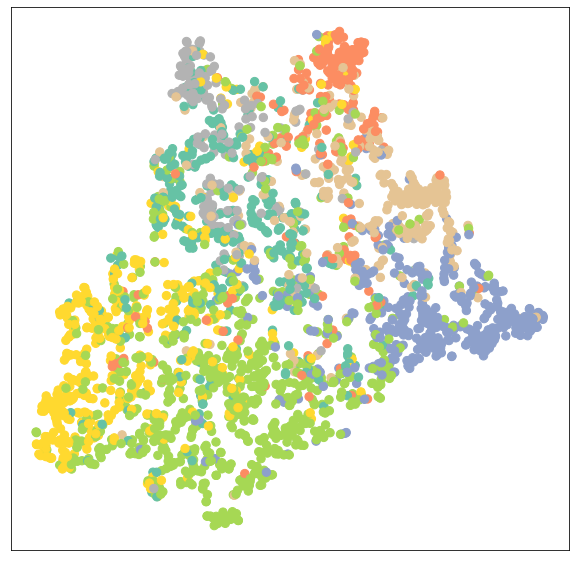

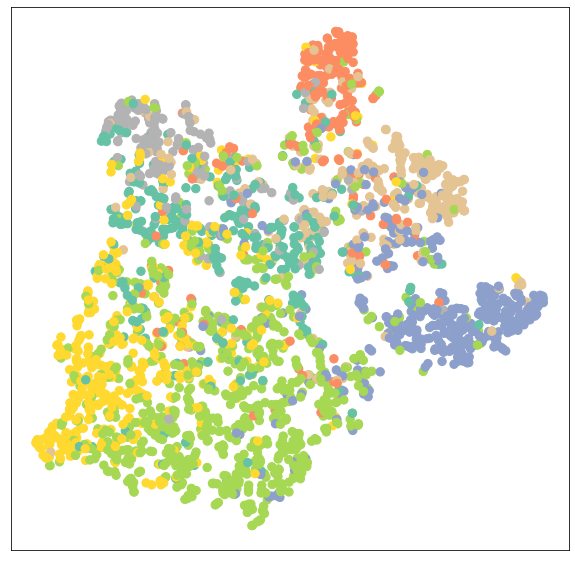

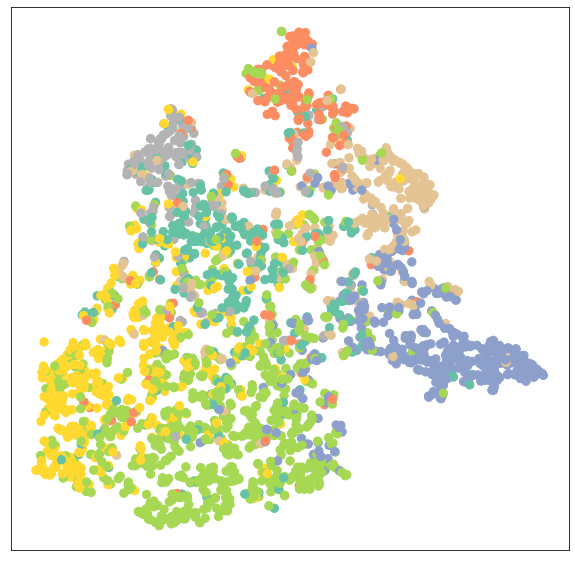

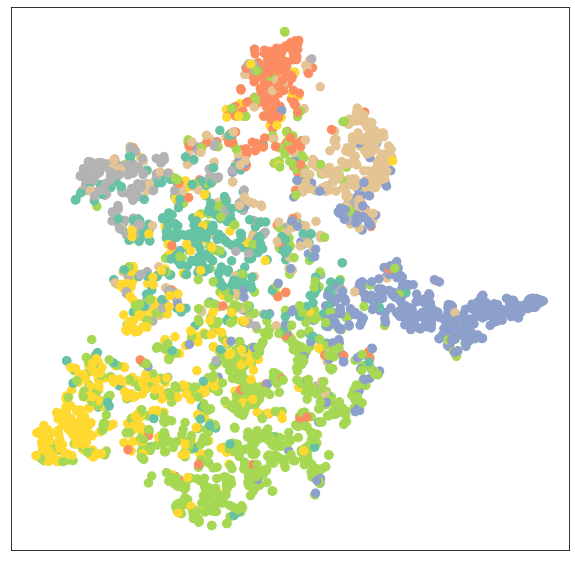

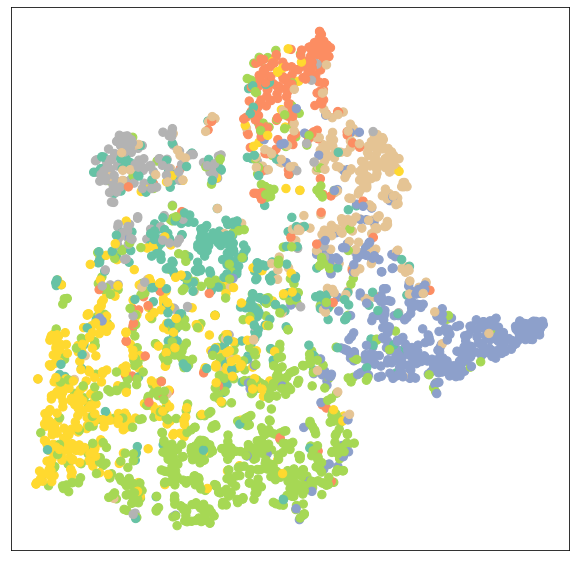

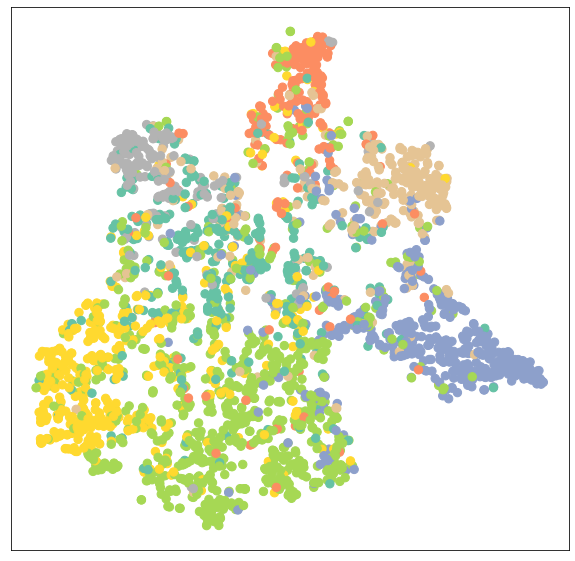

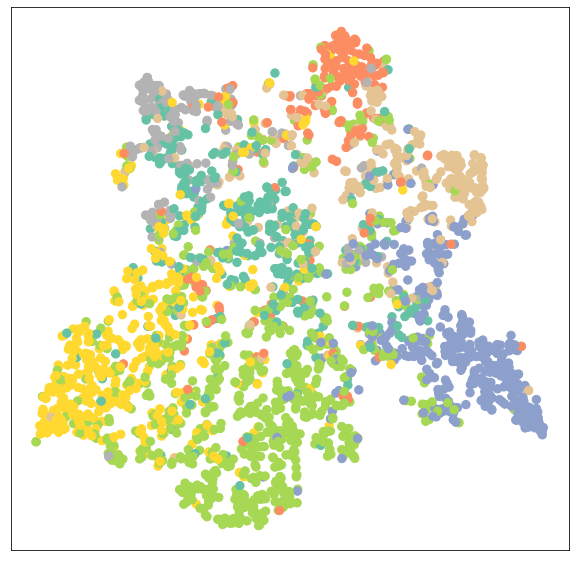

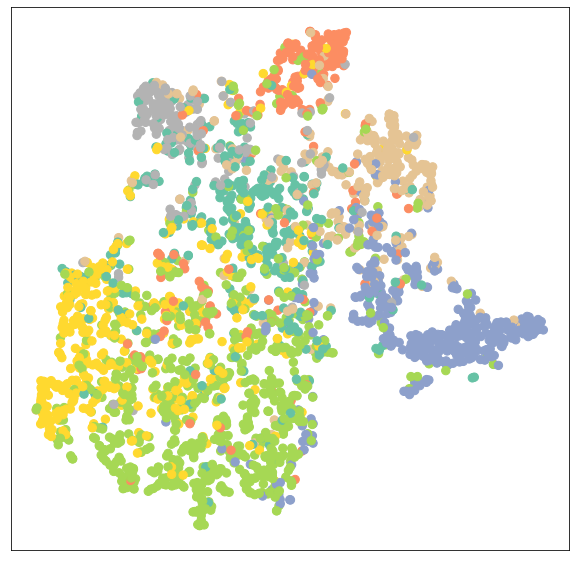

In [118]:
for epoch in range(201):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=None)
        time.sleep(0.3)
        ## Added by Me
        final_h = h

In [121]:
GravNetConv??

Init signature:
GravNetConv(
    in_channels: int,
    out_channels: int,
    space_dimensions: int,
    propagate_dimensions: int,
    k: int,
    num_workers: Optional[int] = None,
    **kwargs,
)
Source:        
class GravNetConv(MessagePassing):
    r"""The GravNet operator from the `"Learning Representations of Irregular
    Particle-detector Geometry with Distance-weighted Graph
    Networks" <https://arxiv.org/abs/1902.07987>`_ paper, where the graph is
    dynamically constructed using nearest neighbors.
    The neighbors are constructed in a learnable low-dimensional projection of
    the feature space.
    A second projection of the input feature space is then propagated from the
    neighbors to each vertex using distance weights that are derived by
    applying a Gaussian function to the distances.

    Args:
        in_channels (int): Size of each input sample, or :obj:`-1` to derive
            the size from the first input(s) to the forward method.
        out_channels (

In [127]:
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(dataset.num_features, hidden_channels)
        self.conv2 = GATConv(hidden_channels, dataset.num_classes)
        self.classifier = Linear(7, 2708)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        out = self.classifier(x)
        
        return out, x

model = GAT(hidden_channels=16)
print(model)

GAT(
  (conv1): GATConv(1433, 16, heads=1)
  (conv2): GATConv(16, 7, heads=1)
  (classifier): Linear(in_features=7, out_features=2708, bias=True)
)


In [129]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GAT(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train(data):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, h

def test():
      model.eval()
      out, h = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 101):
    loss, h = train(data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 7.9953
Epoch: 002, Loss: 7.9627
Epoch: 003, Loss: 7.9280
Epoch: 004, Loss: 7.8911
Epoch: 005, Loss: 7.8507
Epoch: 006, Loss: 7.7991
Epoch: 007, Loss: 7.7419
Epoch: 008, Loss: 7.6831
Epoch: 009, Loss: 7.6096
Epoch: 010, Loss: 7.5211
Epoch: 011, Loss: 7.4242
Epoch: 012, Loss: 7.3222
Epoch: 013, Loss: 7.1850
Epoch: 014, Loss: 7.0381
Epoch: 015, Loss: 6.8278
Epoch: 016, Loss: 6.6582
Epoch: 017, Loss: 6.4541
Epoch: 018, Loss: 6.2077
Epoch: 019, Loss: 5.9350
Epoch: 020, Loss: 5.4738
Epoch: 021, Loss: 5.2227
Epoch: 022, Loss: 4.7919
Epoch: 023, Loss: 4.3648
Epoch: 024, Loss: 3.9793
Epoch: 025, Loss: 3.5488
Epoch: 026, Loss: 3.3102
Epoch: 027, Loss: 2.9834
Epoch: 028, Loss: 2.8037
Epoch: 029, Loss: 2.6896
Epoch: 030, Loss: 2.5838
Epoch: 031, Loss: 2.4372
Epoch: 032, Loss: 2.3201
Epoch: 033, Loss: 2.2621
Epoch: 034, Loss: 2.1563
Epoch: 035, Loss: 2.1077
Epoch: 036, Loss: 2.0710
Epoch: 037, Loss: 2.0383
Epoch: 038, Loss: 2.0254
Epoch: 039, Loss: 2.0449
Epoch: 040, Loss: 2.0270


In [130]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.4340


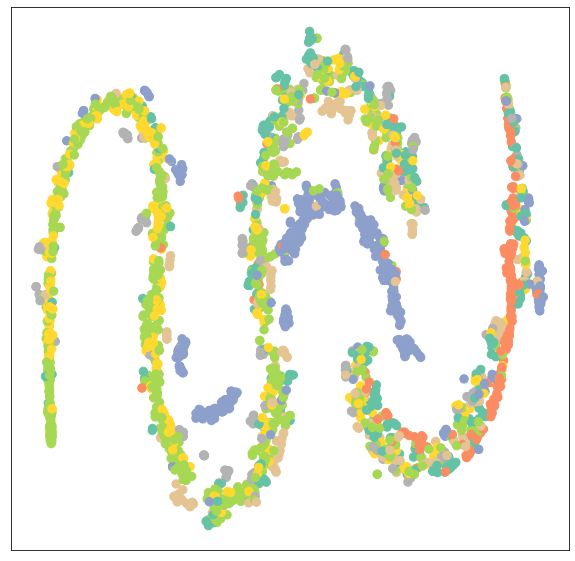

In [131]:
model.eval()

out, h = model(data.x, data.edge_index)
visualize(out, color=data.y)